<h1><center>Praktikum Pemodelan Statistika terapan</center></h1>
<h2><center>Dosen Pengampu Ronny Sutsetyoko	</center></h2>

#

<img src="logo pens.png" 
        alt="Picture" 
        width="380" 
        height="380" 
        style="display: block; margin: 0 auto" />

#

#

#

#

<h4><center>Wahyu Ikbal Maulana</center></h4>

<h4><center>3323600056</center></h4>

<h4><center>D4 SDT B</center></h4>

<h2><center>Politeknik Elektronika Negeri Surabaya</center></h2>
  ‎ 


## Percobaan ke-1: Studi Kasus 1

In [1]:
library(DT)     #Menampilkan tabel agar mudah dilihat di browser
library(MVN)    #Uji multivariate normal
library(MASS)   #Fungsi diskriminan analisis
library(biotools) #Melakukan uji Box-M

Warning message:
"package 'DT' was built under R version 4.3.2"
Warning message:
"package 'MVN' was built under R version 4.3.3"
Warning message:
"package 'biotools' was built under R version 4.3.3"
---
biotools version 4.2



In [2]:
data("iris")
datatable(iris)

HTML widgets cannot be represented in plain text (need html)

In [18]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


: 

$multivariateNormality
           Test       HZ p value MVN
1 Henze-Zirkler 2.336394       0  NO

$univariateNormality
              Test     Variable Statistic   p value Normality
1 Anderson-Darling Sepal.Length    0.8892  0.0225      NO    
2 Anderson-Darling Sepal.Width     0.9080  0.0202      NO    
3 Anderson-Darling Petal.Length    7.6785  <0.001      NO    
4 Anderson-Darling Petal.Width     5.1057  <0.001      NO    

$Descriptives
               n     Mean   Std.Dev Median Min Max 25th 75th       Skew
Sepal.Length 150 5.843333 0.8280661   5.80 4.3 7.9  5.1  6.4  0.3086407
Sepal.Width  150 3.057333 0.4358663   3.00 2.0 4.4  2.8  3.3  0.3126147
Petal.Length 150 3.758000 1.7652982   4.35 1.0 6.9  1.6  5.1 -0.2694109
Petal.Width  150 1.199333 0.7622377   1.30 0.1 2.5  0.3  1.8 -0.1009166
               Kurtosis
Sepal.Length -0.6058125
Sepal.Width   0.1387047
Petal.Length -1.4168574
Petal.Width  -1.3581792

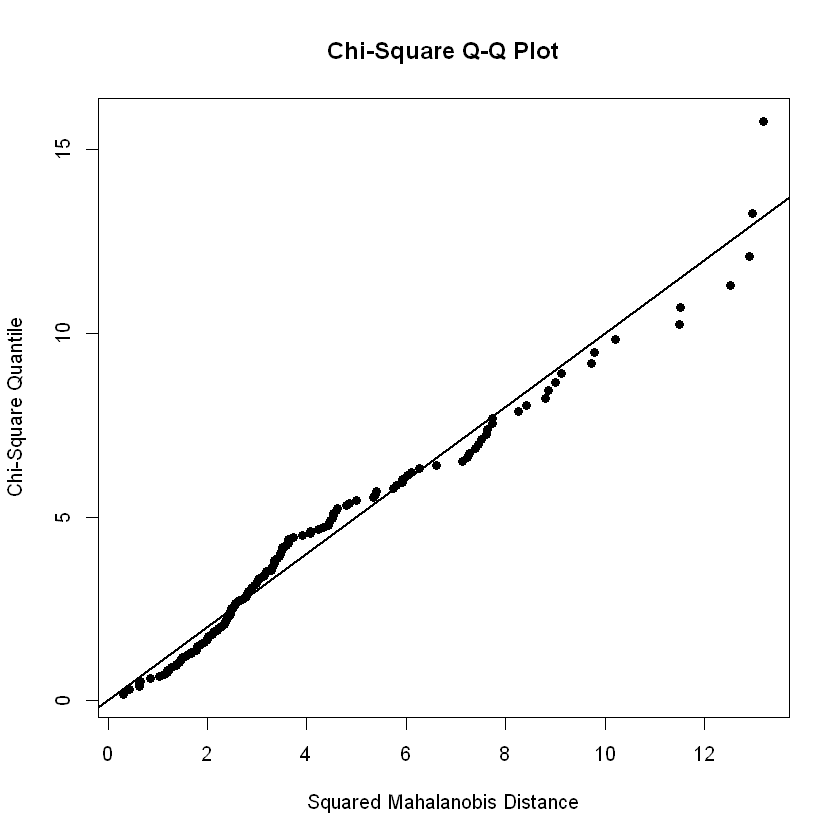

In [4]:
mvn(data = iris[, c(1:4)], multivariatePlot = 'qq') #hanya mengambil kolom variabel prediktor

In [5]:
boxM(data = iris[, c(1:4)], grouping = iris[,5])


	Box's M-test for Homogeneity of Covariance Matrices

data:  iris[, c(1:4)]
Chi-Sq (approx.) = 140.94, df = 20, p-value < 2.2e-16


In [6]:
set.seed(123)
train_index <- sample(seq(nrow(iris)), size = floor(0.75 * nrow(iris)), replace = F)
training_data <- iris[train_index, ]
test_data <- iris[-train_index, ]

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Dalam regresi logistik multinomial memakai library nnet, menghasilkan model training yang mengiterasi optimisasi train model. Optimisasi tersebut bertujual untuk meminimalkan fungsi objektivitas untuk menemukan model parameter yang optimal. Optimisasi terhenti setelah mencapai kriteria convergence, saat dimana improvisasi objek sudah kecil dan maksimum iterasi tercapai. Nilai AIC yang cenderung rendah menunjukkan bahwa model memiliki kualitas yang baik.
</div>

In [7]:
linearDA <- lda(formula = Species ~., data = training_data)
linearDA

Call:
lda(Species ~ ., data = training_data)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3392857  0.2946429  0.3660714 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa         4.976316    3.405263     1.471053   0.2578947
versicolor     5.966667    2.784848     4.303030   1.3393939
virginica      6.585366    2.956098     5.534146   2.0097561

Coefficients of linear discriminants:
                    LD1        LD2
Sepal.Length  0.8739864 -0.1767027
Sepal.Width   1.3356317 -1.8714548
Petal.Length -2.1802288  1.1793326
Petal.Width  -2.7858940 -3.1801017

Proportion of trace:
  LD1   LD2 
0.993 0.007 

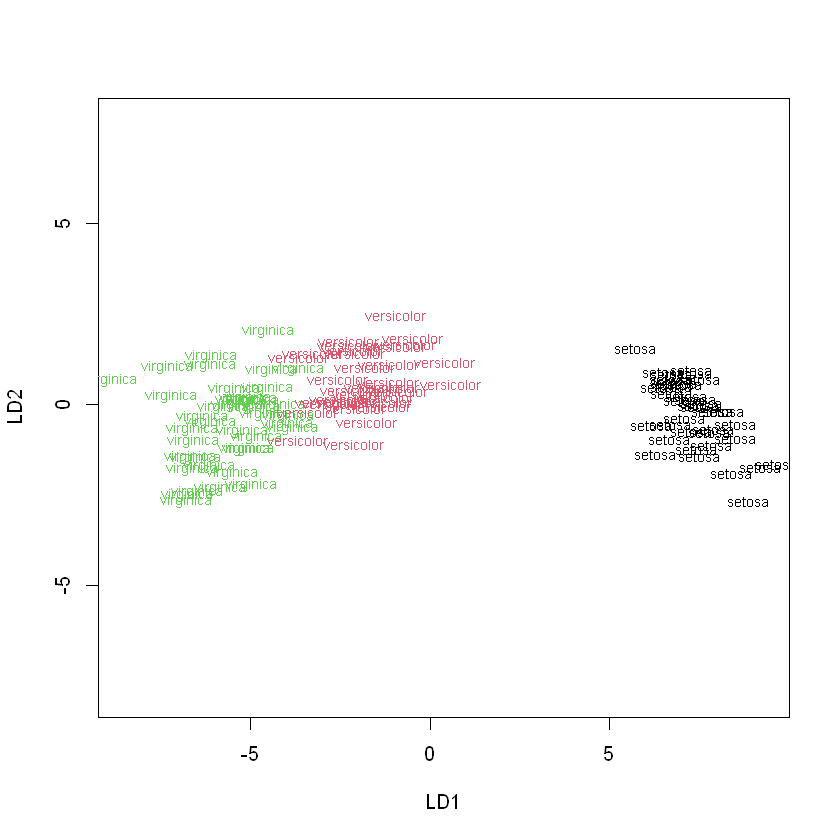

In [8]:
plot(linearDA, col = as.integer(training_data$Species))

In [15]:
library(dplyr)
#Hitung vektor rata-rata untuk setosa
setosa <- training_data %>%
filter(Species == "setosa")
setosa_mean <- sapply(setosa[, -5], mean)
setosa_mean

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   4.9763158    3.4052632    1.4710526    0.2578947

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Regresi multinomial memprediksi probabilitas pengamatan tertentu untuk menjadi bagian dari kelas tertentu. Kolom mewakili tingkat klasifikasi dan baris mewakili pengamatan. 20 baris pertama terklasifikasi sebagai carsinoma dan 20 baris terakhir tergolong sebagai adipose
</div>

In [10]:
#Menghitung matriks kovarians untuk setosa 
setosa_cov <- cov(setosa[, -5])
setosa_cov

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.13428876,0.108776671,0.014431010,0.01384068
Sepal.Width,0.10877667,0.159431010,0.008805121,0.01428165
Petal.Length,0.01443101,0.008805121,0.035085349,0.00712660
Petal.Width,0.01384068,0.014281650,0.007126600,0.01331437


In [11]:
#Hitung vektor rata-rata untuk versicolor
vcolor <- training_data %>% filter(Species == "versicolor")
vcolor_mean <- sapply(vcolor[, -5], mean)
vcolor_mean

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.966667     2.784848     4.303030     1.339394

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Didapat untuk akurasi skor dari tiap tiap konfigurasi dan semua plot yang. Didapat bahwa akurasinya sangat tinggi yaitu 98.68%. Disimpulkan bahwa model bagus dan stabil.
</div>

In [12]:
#Hitung vektor rata-rata untuk virginica
virgin <- training_data %>% filter(Species =="virginica")
virgin_mean <- sapply(virgin[, -5], mean)
virgin_mean

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    6.585366     2.956098     5.534146     2.009756

In [13]:
#Menghitung matriks kovarians untuk virginica[Date]        12
virgin_cov <- cov(virgin[, -5])
virgin_cov

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.46778049,0.11634146,0.36226220,0.05839634
Sepal.Width,0.11634146,0.11452439,0.08878659,0.04443902
Petal.Length,0.36226220,0.08878659,0.35130488,0.05640854
Petal.Width,0.05839634,0.04443902,0.05640854,0.06990244


In [14]:
#Menghitung matriks kovarians gabungan(S-pooled)
Spooled <- (16 * setosa_cov + 16 * vcolor_cov + 16 * virgin_cov) / (16+16+16)
Spooled

ERROR: Error in eval(expr, envir, enclos): object 'vcolor_cov' not found


In [ ]:
#Linear Score Function untuk species setosa
#a. Intercept
sb0=-0.5*t(setosa_mean)%*%solve(Spooled) %*%  setosa_mean
#b. Koeffisien
sb1=t(setosa_mean) %*% solve(Spooled)
sb0
sb1

In [ ]:
#Linear Score Function untuk species vcolor
#a. Intercept
cb0=-0.5*t(vcolor_mean)%*%solve(Spooled)%*%vcolor_mean
#b. Koeffisien
cb1=t(vcolor_mean) %*% solve(Spooled)
cb0
cb1

In [ ]:
#Linear Score Function untuk species virginica
#a. Intercept
vb0=-0.5*t(virgin_mean)%*%solve(Spooled) %*%  virgin_mean
#b. Koeffisien
vb1=t(virgin_mean) %*% solve(Spooled)
vb0
vb1

In [ ]:
# Coba klasifikasi secara manual
X1<-c(5,3.5,1.6,0.6)
DL_s = sb0 + sb1[1]*X1[1] + sb1[2]*X1[2] + sb1[3]*X1[3] + sb1[4]*X1[4] + log(0.34)
DL_c = cb0 + cb1[1]*X1[1] + cb1[2]*X1[2] + cb1[3]*X1[3] + cb1[4]*X1[4] + log(0.29)
DL_v = vb0 + sb1[1]*X1[1] + sb1[2]*X1[2] + sb1[3]*X1[3] + sb1[4]*X1[4] + log(0.37)
maks=DL_s
if (DL_c>maks) maks=DL_c
if (DL_v>maks) maks=DL_v
maks
if(maks==DL_s){print("X1 adalah setosa")
}else if(maks==DL_c){ print("X1 adalah versicolor") }else {print("X1 adalah virginica")}

In [ ]:
# Coba klasifikasi secara manual
X1<-c(6.7,3.1,4.4,1.4)
DL_s = sb0 + sb1[1]*X1[1] + sb1[2]*X1[2] + sb1[3]*X1[3] + sb1[4]*X1[4] + log(0.34)
DL_c = cb0 + cb1[1]*X1[1] + cb1[2]*X1[2] + cb1[3]*X1[3] + cb1[4]*X1[4] + log(0.29)
DL_v = vb0 + sb1[1]*X1[1] + sb1[2]*X1[2] + sb1[3]*X1[3] + sb1[4]*X1[4] + log(0.37)
maks=DL_s
if (DL_c>maks) maks=DL_c
if (DL_v>maks) maks=DL_v
maks
if(maks==DL_s){print("X1 adalah setosa")
}else if(maks==DL_c){print("X1 adalah versicolor") }else {print("X1 adalah virginica")}

In [ ]:
library(klaR)
partimat(Species~., data=training_data, method="lda")

In [ ]:
predicted<-predict(object = linearDA, newdata = test_data)
table(actual=test_data$Species,predicted=predicted$class)

In [ ]:
quadraticDA<-qda(formula= Species ~., data = training_data)
quadraticDA

In [ ]:
predicted<-predict(object=quadraticDA,newdata = test_data)
table(actual=test_data$Species,predicted= predicted$class)

## Percobaan ke-2: Studi Kasus 2